Regression coefficients: 
 [ 0.16544985 -0.0606119   0.00169306  0.02905694 -0.7734146   0.95707581]
Variance score: 0.896186946771412
Mean Squared Error of test data:  0.69024145613319
Mean Squared Error of train data:  0.2125190362485232
Real new dose :  [10.  5.  6.  6.  4.  8. 12.  4.  4.  6.  4.  7.  3.  8. 10.]
Predicted new dose :  [ 9.97575463  4.31558305  5.850482    5.78554748  3.9812724   9.84675816
 11.58112159  3.97642337  4.54833675  6.00658567  3.41414188  6.60794479
  3.95533643  7.54670644 12.07691699]


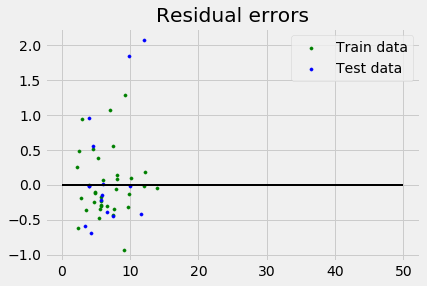

In [4]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics
import csv
from copy import deepcopy

def load_csv(filename):
    raw_data = open(filename, 'rt')
    reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
    x = list(reader)
    data = np.array(x).astype('float')
    return data
    
def splitDataset(dataset, splitratio):
    trainsize = int(np.round(dataset.shape[0]*splitratio))
    trainset = np.zeros((trainsize,dataset.shape[1]))#array to store the training set.
    testset = deepcopy(dataset)#create a copy of the dataset in test set.
    for numsamples in range(trainsize):
        indx = np.random.randint(0,testset.shape[0])#random index generation
        trainset[numsamples,:] = testset[indx,:]#adding the randomly selected data vector to the training set
        testset = np.delete(testset, indx, axis = 0)#delete the selected observation from the test set.
    return trainset,testset

data = load_csv('preprocessed_data.csv')
trainset, testset = splitDataset(data,0.7)

x_train = trainset[:,:-1]
y_train = trainset[:,-1]

x_test = testset[:,:-1]
y_test = testset[:,-1]
  
# create linear regression object 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(x_train, y_train) 
  
# regression coefficients 
print('Regression coefficients: \n', reg.coef_) 
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(x_test, y_test))) 

# mean squared error
print('Mean Squared Error of test data: ', metrics.mean_squared_error(y_test, reg.predict(x_test)))
print('Mean Squared Error of train data: ', metrics.mean_squared_error(y_train, reg.predict(x_train)))

# real and predicted new dose
print('Real new dose : ', y_test)
print('Predicted new dose : ', reg.predict(x_test))

# plot for residual error 
  
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(reg.predict(x_train), reg.predict(x_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(reg.predict(x_test), reg.predict(x_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show()
